## 6.1 ConvNet: MNIST image classifier

In [1]:
# Load libraries
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#### Load data

In [2]:
# Load MNIST data set and sort into train/test groups
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

#### Build the model

In [3]:
# Instantiate a convnet
inputs = keras.Input(shape=(28, 28, 1)) # This is the format of the MNIST images
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs) # 32 channels
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
# Compile model
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

#### Validate the model

In [5]:
## Set aside a validation set (10000 samples)
# Data
validation_images = train_images[:10000]
partial_train_images = train_images[10000:]
# Labels
validation_labels = train_labels[:10000]
partial_train_labels = train_labels[10000:]

In [6]:
# Train the model
history = model.fit(partial_train_images,
                   partial_train_labels,
                   epochs=5,
                   batch_size=64,
                   validation_data=(validation_images, validation_labels))

Epoch 1/5
782/782 [==============================] - 13s 17ms/step - loss: 0.1694 - accuracy: 0.9473 - val_loss: 0.0838 - val_accuracy: 0.9735
Epoch 2/5
782/782 [==============================] - 12s 16ms/step - loss: 0.0464 - accuracy: 0.9856 - val_loss: 0.0414 - val_accuracy: 0.9885
Epoch 3/5
782/782 [==============================] - 12s 15ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0479 - val_accuracy: 0.9873
Epoch 4/5
782/782 [==============================] - 12s 15ms/step - loss: 0.0240 - accuracy: 0.9927 - val_loss: 0.0388 - val_accuracy: 0.9888
Epoch 5/5
782/782 [==============================] - 11s 14ms/step - loss: 0.0186 - accuracy: 0.9939 - val_loss: 0.0362 - val_accuracy: 0.9903


#### Plot the model

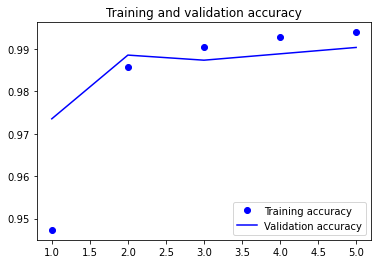

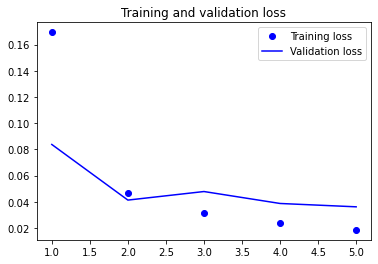

In [7]:
# Plot the training and validation accuracy and loss
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Evaluate the model

In [8]:
# Evaluate the convnet
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc*100:.1f}%')
print(f'Test loss: {test_loss:.3f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0247 - accuracy: 0.9924
Test accuracy: 99.2%
Test loss: 0.025


## 6.2 ConvNet: CIFAR10 image classifier

In [9]:
# Load libraries
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

#### Load the data

In [10]:
# Load the CIFAR10 data set
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [11]:
## Set aside a validation set (10,000 samples)
# Data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
# Labels
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 6.2.a - no dropout or data-augmentation

#### Build the model

In [12]:
# Instantiate the convnet
inputs = keras.Input(shape=(32, 32, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
# Compile model
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

#### Train the model

In [14]:
# Train model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=30,
                   batch_size=64,
                   validation_data=(x_val, y_val))

Epoch 1/30
625/625 [==============================] - 12s 19ms/step - loss: 1.6456 - accuracy: 0.4051 - val_loss: 1.3288 - val_accuracy: 0.5229
Epoch 2/30
625/625 [==============================] - 12s 19ms/step - loss: 1.2666 - accuracy: 0.5530 - val_loss: 1.2158 - val_accuracy: 0.5705
Epoch 3/30
625/625 [==============================] - 12s 19ms/step - loss: 1.0856 - accuracy: 0.6192 - val_loss: 1.0204 - val_accuracy: 0.6475
Epoch 4/30
625/625 [==============================] - 12s 19ms/step - loss: 0.9645 - accuracy: 0.6655 - val_loss: 0.9845 - val_accuracy: 0.6519
Epoch 5/30
625/625 [==============================] - 12s 19ms/step - loss: 0.8737 - accuracy: 0.6967 - val_loss: 0.9111 - val_accuracy: 0.6844
Epoch 6/30
625/625 [==============================] - 12s 19ms/step - loss: 0.7975 - accuracy: 0.7250 - val_loss: 0.9340 - val_accuracy: 0.6852
Epoch 7/30
625/625 [==============================] - 12s 19ms/step - loss: 0.7332 - accuracy: 0.7461 - val_loss: 0.8272 - val_accuracy:

#### Plot the model

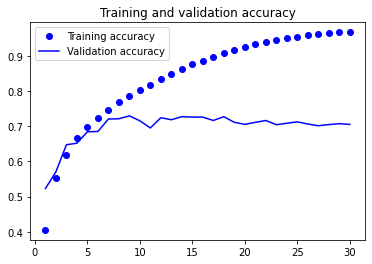

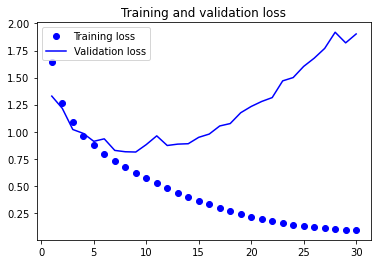

In [15]:
# Plot the training and validation accuracy and loss
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Evaluate the model

In [16]:
# Evaluate the convnet
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc*100:.1f}%')
print(f'Test loss: {test_loss:.3f}')

313/313 [==============================] - 2s 5ms/step - loss: 1.9599 - accuracy: 0.7072
Test accuracy: 70.7%
Test loss: 1.960


### 6.2.b - with dropout and data-augmentation

In [17]:
# define a data augmentation stage to add to the image model
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
    ]
)

#### Build the model

In [18]:
# instantiate the convnet that includes image augmentation and dropout
inputs = keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [19]:
# Compile model
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

#### Train the model

In [20]:
# Train model
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=30,
                   batch_size=64,
                   validation_data=(x_val, y_val))

Epoch 1/30
625/625 [==============================] - 12s 19ms/step - loss: 1.7057 - accuracy: 0.3837 - val_loss: 1.5910 - val_accuracy: 0.4340
Epoch 2/30
625/625 [==============================] - 12s 19ms/step - loss: 1.3442 - accuracy: 0.5219 - val_loss: 1.2188 - val_accuracy: 0.5765
Epoch 3/30
625/625 [==============================] - 12s 19ms/step - loss: 1.1823 - accuracy: 0.5828 - val_loss: 1.0946 - val_accuracy: 0.6210
Epoch 4/30
625/625 [==============================] - 12s 19ms/step - loss: 1.0811 - accuracy: 0.6229 - val_loss: 0.9973 - val_accuracy: 0.6545
Epoch 5/30
625/625 [==============================] - 12s 19ms/step - loss: 1.0007 - accuracy: 0.6523 - val_loss: 0.9702 - val_accuracy: 0.6597
Epoch 6/30
625/625 [==============================] - 12s 19ms/step - loss: 0.9391 - accuracy: 0.6702 - val_loss: 0.8977 - val_accuracy: 0.6862
Epoch 7/30
625/625 [==============================] - 12s 19ms/step - loss: 0.8848 - accuracy: 0.6920 - val_loss: 0.8783 - val_accuracy:

#### Plot the model

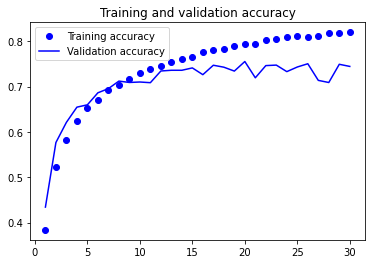

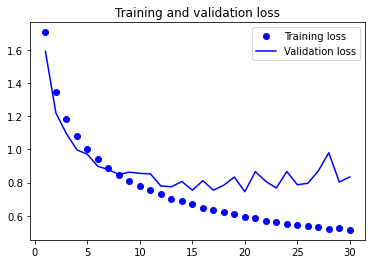

In [21]:
# Plot the training and validation accuracy and loss
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Evaluate the model

In [22]:
# Evaluate the convnet
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc*100:.1f}%')
print(f'Test loss: {test_loss:.3f}')

313/313 [==============================] - 2s 5ms/step - loss: 0.8535 - accuracy: 0.7324
Test accuracy: 73.2%
Test loss: 0.854


Notice the model with data-augmentation and dropout has better test accuracy and lower test loss that the default model.

## 6.3 ResNet50 model: image classification

In [23]:
# Load libraries
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

#### Load the model

In [24]:
# Load model
model = ResNet50(weights='imagenet')

#### Classify images

In [25]:
# Classify image of an elephant
img_path = 'images/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02504458', 'African_elephant', 0.88571393), ('n01871265', 'tusker', 0.06552583), ('n02504013', 'Indian_elephant', 0.036657803)]


In [26]:
# Classify image of a penguin
img_path = 'images/penguin.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02056570', 'king_penguin', 0.88084424), ('n02058221', 'albatross', 0.098850325), ('n01855032', 'red-breasted_merganser', 0.0064048013)]


In [27]:
# Classify image of a cuttlefish
img_path = 'images/cuttlefish.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02526121', 'eel', 0.36378446), ('n09256479', 'coral_reef', 0.15230681), ('n01496331', 'electric_ray', 0.08756326)]


In [28]:
# Classify image of an ocelot
img_path = 'images/ocelot.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02128925', 'jaguar', 0.84859693), ('n02128385', 'leopard', 0.10983749), ('n02129604', 'tiger', 0.016701555)]


In [29]:
# Classify image of a sperm whale
img_path = 'images/sperm_whale.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02071294', 'killer_whale', 0.49826032), ('n01484850', 'great_white_shark', 0.14165588), ('n02066245', 'grey_whale', 0.1368286)]


In [30]:
# Classify image of a bowl of petunias
img_path = 'images/bowl_of_petunias.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03991062', 'pot', 0.95239794), ('n04522168', 'vase', 0.023219729), ('n02797295', 'barrow', 0.0024953063)]


In [31]:
# Classify image of a hitchhiker
img_path = 'images/cosmic_cutie.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n06359193', 'web_site', 0.263159), ('n03720891', 'maraca', 0.095758), ('n02834397', 'bib', 0.042007394)]


In [32]:
# Classify image of the answer to life, the universe, and everything
img_path = 'images/42.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)

# decode the results into a list of tuples (class, description, probability)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n03532672', 'hook', 0.24600993), ('n03476684', 'hair_slide', 0.120847315), ('n02910353', 'buckle', 0.06853741)]
